<a href="https://colab.research.google.com/github/gomezguzmangalileaguadalupe-create/RNNs/blob/main/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

# Cargamos el archivo
# Para archivos Excel (.xls o .xlsx), se debe usar pd.read_excel().
_df = pd.read_excel("/content/Indicadores20251116205227.xls", header=4)


# Ordenamos correctamente (descendente)
_df = _df.sort_index(ascending=False)

_df.head()

,Periodos,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > Índice general /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > Subyacente > total /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > Subyacente > Mercancías /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > Subyacente > Servicios /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > No subyacente > total /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > No subyacente > Agropecuarios /f1 (Variación porcentual) Mensual,Indicadores económicos de coyuntura > Índices de precios > Índice Nacional de Precios al Consumidor. Base segunda quincena Julio 2018. Actualización de Canasta y Ponderadores 2024 > Mensual > Inflación mensual interanual > No subyacente > Energéticos y tarifas autorizadas por el gobierno /f1 (Variación porcentual) Mensual
216,/f1 INEGI. Índices de precios.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Fuente:,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,2025/10,3.57,4.28,4.12,4.44,1.18,0.10,2.07
212,2025/09,3.76,4.28,4.19,4.36,2.02,2.76,1.42


In [23]:
# 2. Nombrar las columnas
# El error 'Length mismatch' indica que el número de nombres de columna (8) no coincide con el número real de columnas en el DataFrame (7).
# Ajustamos la lista de nombres para que coincida con 7 columnas.
_df.columns = [
    'Periodo',                 # Fecha (ej: 2008/01)
    'General',                 # Inflación General
    'Subyacente_Total',        # Inflación Subyacente Total
    'Subyacente_Mercancias',   # Inflación Subyacente Mercancías
    'Subyacente_Servicios',    # Inflación Subyacente Servicios
    'No_Subyacente_Total',     # Inflación No Subyacente Total (Este fue el campo faltante)
    'No_Subyacente_Agro',      # Inflación No Subyacente Agropecuarios
    'No_Subyacente_Energia'    # Inflación No Subyacente Energéticos
]

In [24]:
# 3. Convertir a formato de fecha
# Le decimos a Python que la columna 'Periodo' son fechas (Año/Mes).
# Usamos errors='coerce' para convertir los valores no válidos a NaT (Not a Time).
_df['Periodo'] = pd.to_datetime(_df['Periodo'], format='%Y/%m', errors='coerce')

# Eliminamos las filas donde 'Periodo' es NaT (los valores que no pudieron convertirse a fecha).
_df.dropna(subset=['Periodo'], inplace=True)

# Convertimos la columna 'Periodo' a tipo fecha, si no lo estaba ya después del dropna
_df['Periodo'] = pd.to_datetime(_df['Periodo'])

_df.head()

,Periodo,General,Subyacente_Total,Subyacente_Mercancias,Subyacente_Servicios,No_Subyacente_Total,No_Subyacente_Agro,No_Subyacente_Energia
213,2025-10-01,3.57,4.28,4.12,4.44,1.18,0.10,2.07
212,2025-09-01,3.76,4.28,4.19,4.36,2.02,2.76,1.42
211,2025-08-01,3.57,4.23,4.05,4.40,1.38,1.21,1.51
210,2025-07-01,3.51,4.23,4.02,4.44,1.14,0.17,1.97
209,2025-06-01,4.32,4.24,3.91,4.62,4.33,5.04,3.56


In [25]:
# 4. Ordenar los datos
# Ordenamos por fecha, de la más reciente a la más antigua.
_df = _df.sort_values(by='Periodo', ascending=False)

In [26]:
# 5. Establecer la fecha como índice
# Esto facilita hacer gráficas o buscar por fecha específica.
# Si la columna 'Periodo' ya es el índice, resetearla para que esté disponible como columna antes de establecerla de nuevo.
if 'Periodo' not in _df.columns and isinstance(_df.index, pd.DatetimeIndex) and _df.index.name == 'Periodo':
    _df.reset_index(inplace=True)

_df.set_index('Periodo', inplace=True)
# Mostrar las primeras 5 filas para revisar
_df.head()

,General,Subyacente_Total,Subyacente_Mercancias,Subyacente_Servicios,No_Subyacente_Total,No_Subyacente_Agro,No_Subyacente_Energia
Periodo,,,,,,,
2025-10-01,3.57,4.28,4.12,4.44,1.18,0.10,2.07
2025-09-01,3.76,4.28,4.19,4.36,2.02,2.76,1.42
2025-08-01,3.57,4.23,4.05,4.40,1.38,1.21,1.51
2025-07-01,3.51,4.23,4.02,4.44,1.14,0.17,1.97
2025-06-01,4.32,4.24,3.91,4.62,4.33,5.04,3.56


In [27]:
# Extraemos solo los valores numéricos de la columna 'General'
# Esto crea un array (arreglo) listo para procesar (ej. para redes neuronales o gráficas)
datos = _df[['General']].values

# Verificamos la forma de los datos (filas, 1 columna)
print(datos.shape)
print(datos[:5]) # Imprimimos los primeros 5 valores

(214, 1)
[[3.57]
 [3.76]
 [3.57]
 [3.51]
 [4.32]]


In [28]:
from sklearn.preprocessing import MinMaxScaler

# 1. Configurar el escalador
# Esto hará que todos los valores de inflación estén entre 0 y 1.
# Es muy útil para redes neuronales (LSTM, etc.) porque aprenden mejor con números pequeños.
scaler = MinMaxScaler(feature_range=(0, 1))

# 2. Transformar los datos
# Usamos la variable 'datos' que creamos antes (que contiene la columna 'General')
scaled_data = scaler.fit_transform(datos)

# Mostramos los primeros 5 valores ya escalados
print(scaled_data[:5])

[[0.21917808]
 [0.24809741]
 [0.21917808]
 [0.21004566]
 [0.33333333]]


In [29]:
# Definimos el tamaño de la ventana de tiempo
# Usamos 12 porque los datos son mensuales (12 meses = 1 año de historia)
window_size = 12

In [30]:
import numpy as np

def create_sequences(data, window_size):
    sequences = []
    labels = []

    # Recorremos los datos. El límite es el total menos el tamaño de la ventana
    for i in range(len(data) - window_size):
        # Creamos la secuencia de entrada (los 12 meses anteriores, por ejemplo)
        sequences.append(data[i:i+window_size])

        # La etiqueta es el valor que queremos predecir (el mes siguiente)
        # Usamos la columna 0 porque 'scaled_data' solo tiene la columna 'General'
        labels.append(data[i + window_size, 0])

    return np.array(sequences), np.array(labels)


# Si tus datos 'scaled_data' tienen el 2025 en la primera fila, están al revés.
# Descomenta la siguiente línea para ponerlos en orden cronológico (2008 -> 2025):
# scaled_data = scaled_data[::-1]

# Creamos las secuencias (X) y las etiquetas (y)
X, y = create_sequences(scaled_data, window_size)

print(f"Tamaño de X (Entrada): {X.shape}") # (Muestras, 12, 1)
print(f"Tamaño de y (Salida): {y.shape}")  # (Muestras,)

Tamaño de X (Entrada): (202, 12, 1)
Tamaño de y (Salida): (202,)


In [31]:
# Calculamos el índice de corte (80% de los meses para entrenar)
split = int(len(X) * 0.8)

# Conjunto de ENTRENAMIENTO (80%):
# Aquí es donde la IA aprende.
# Deberían ser los datos más antiguos (ej. 2008 - 2021 aprox).
X_train, y_train = X[:split], y[:split]

# Conjunto de PRUEBA (20%):
# Aquí es donde evaluamos si la IA aprendió bien.
# Deberían ser los datos más recientes (ej. 2022 - 2025).
X_test, y_test = X[split:], y[split:]

print(f"Meses para entrenar: {len(X_train)}")
print(f"Meses para probar: {len(X_test)}")

Meses para entrenar: 161
Meses para probar: 41


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN

# Inicializamos el modelo secuencial
model = Sequential()

# Capa 1: SimpleRNN con 120 neuronas
# input_shape=(window_size, 1) -> Significa que entra una ventana de 12 meses con 1 dato cada mes.
# return_sequences=True -> Pasa la secuencia completa a la siguiente capa RNN.
model.add(SimpleRNN(units=120, return_sequences=True, input_shape=(window_size, X_train.shape[2])))

# Capa 2: SimpleRNN con 60 neuronas
# return_sequences=False -> Esta capa ya no devuelve una secuencia, sino un único vector de características
# (resume lo aprendido de los 12 meses anteriores).
model.add(SimpleRNN(units=60, return_sequences=False))

# Capa 3: Densa (procesamiento intermedio)
model.add(Dense(units=30))

# Capa de Salida: 1 sola neurona
# Queremos predecir 1 solo valor: la inflación del mes siguiente.
model.add(Dense(units=1))

# Mostramos el resumen de la arquitectura
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 12, 120)        │        14,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60)             │        10,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,361 (106.88 KB)

 Trainable params: 27,361 (106.88 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
from tensorflow.keras.optimizers import Adam

# 1. Configurar el optimizador (El "cerebro" del entrenamiento)
# learning_rate=0.001 es una velocidad estándar.
# Si ves que el error no baja, puedes intentar reducirlo a 0.0001.
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

# 2. Compilar el modelo
# 'mean_squared_error' es perfecto para regresión (predecir números exactos como la inflación).
# La IA tratará de minimizar la diferencia entre su predicción y el dato real del INEGI.
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')

# 3. Entrenar el modelo
# batch_size=1: La IA ajustará sus neuronas después de ver CADA mes.
# Como son pocos datos (unos 200 registros), esto está bien.
# epochs=10: La IA revisará todo el historial de inflación 10 veces completas.
history = model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1521
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0165
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0082
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0050
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0053
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0055
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0039


In [34]:
import numpy as np

# 1. Hacer predicciones con el conjunto de prueba
predictions = model.predict(X_test)

# 2. Desescalar los datos (Convertirlos de 0-1 a porcentajes reales de inflación)
# Como el scaler se ajustó solo a 1 columna, pasamos las predicciones directamente.
predictions = scaler.inverse_transform(predictions)

# Hacemos lo mismo con los valores reales (y_test) para poder compararlos
# Usamos reshape(-1, 1) porque el scaler espera una matriz de 2 dimensiones (filas, 1 columna)
y_test_real = scaler.inverse_transform(y_test.reshape(-1, 1))

# Verificamos los primeros resultados
print("Predicción:", predictions[:5].flatten())
print("Real:", y_test_real[:5].flatten())

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step
Predicción: [3.2393959 3.2116911 3.3300514 2.8782365 3.6938636]
Real: [3.25 3.36 3.04 3.57 3.78]


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculamos el error comparando las predicciones con los valores reales
# Usamos 'y_test_real' porque en el paso anterior ya lo desescalamos.
mae = mean_absolute_error(y_test_real, predictions)
rmse = np.sqrt(mean_squared_error(y_test_real, predictions))

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

MAE: 0.3039
RMSE: 0.3633


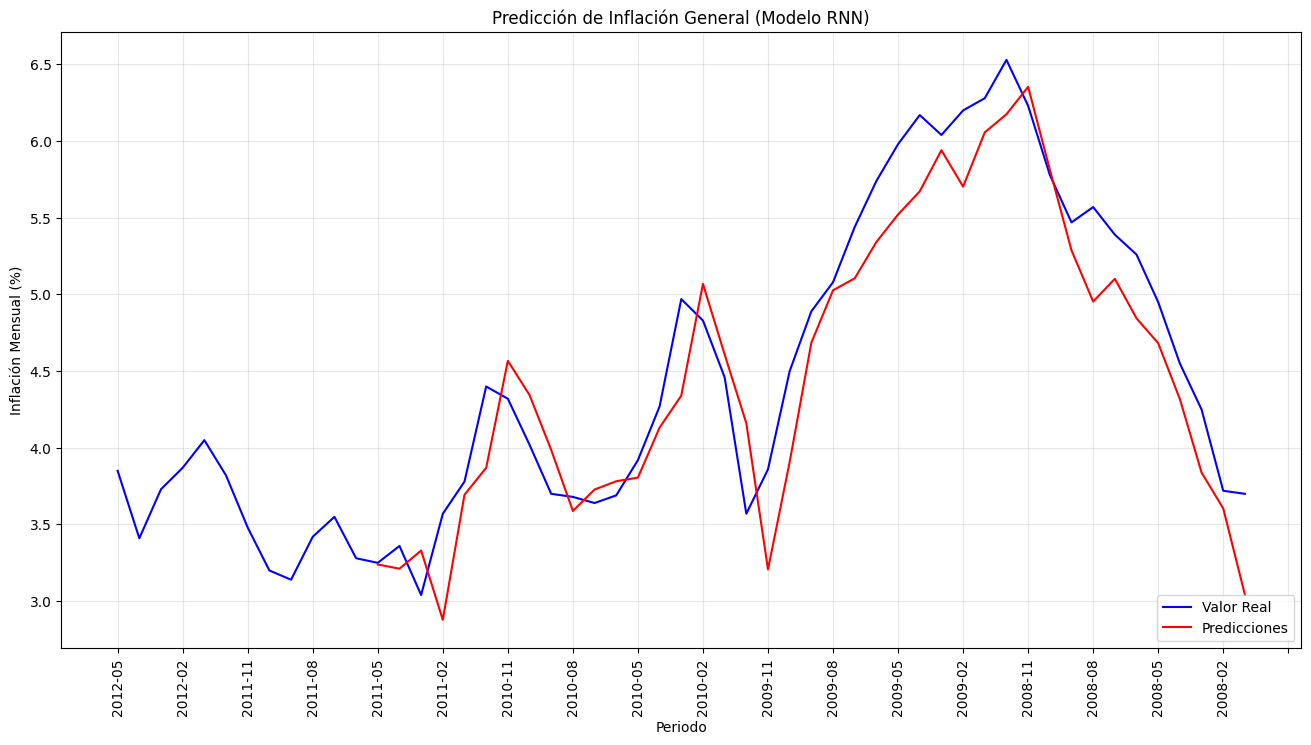

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Preparamos el DataFrame de validación (la parte de prueba)
# Usamos .copy() para evitar advertencias de Pandas
valid = _df[split:].copy()

# 2. Reseteamos el índice
# Quitamos 'drop=True' o usamos valid.reset_index() simple para que 'Periodo' se convierta en columna y no se pierda.
valid = valid.reset_index()

# 3. Inicializar la columna de predicciones con NaN
valid['Predictions'] = np.nan

# 4. Añadir las predicciones
# Las predicciones empiezan después de la primera "ventana" de 12 meses dentro del set de validación.
# Nota: Si 'predictions' te da error de tamaño, prueba usar: predictions.flatten()
# Asignamos usando iloc para asegurar que coincida con el tamaño exacto de las predicciones disponibles
rows_to_fill = len(predictions)
valid.iloc[window_size : window_size + rows_to_fill, valid.columns.get_loc('Predictions')] = predictions

# 5. Formatear las fechas para la gráfica (Año-Mes)
dates_valid = valid['Periodo'].dt.strftime('%Y-%m').tolist()

# 6. Graficar
plt.figure(figsize=(16,8))
plt.title('Predicción de Inflación General (Modelo RNN)')
plt.xlabel('Periodo')
plt.ylabel('Inflación Mensual (%)')

# Graficamos Real vs Predicho
# 'General' es el dato real, 'Predictions' es lo que dijo la IA
plt.plot(valid['General'], label='Valor Real', color='blue')
plt.plot(valid['Predictions'], label='Predicciones', color='red')

# Ajustes del eje X para mostrar las fechas
# Ponemos las etiquetas de fecha en las posiciones correctas
plt.xticks(ticks=range(len(dates_valid)), labels=dates_valid, rotation=90)

# Limitamos la cantidad de etiquetas en el eje X para que se lea bien (opcional, mostrar cada 6 meses)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))

plt.legend(loc='lower right')
plt.grid(True, alpha=0.3) # Agregamos una cuadrícula ligera
plt.show()

In [37]:
# Generar secuencias para los siguientes periodos (meses)
future_predictions = []

# 1. Tomamos la última secuencia disponible de los datos reales
# Esto toma los últimos 12 meses (window_size) de tu historial completo
last_sequence = scaled_data[-window_size:]
# Aseguramos que tenga la forma correcta: (12, 1)
last_sequence = last_sequence.reshape((window_size, 1))

# Definimos cuántos meses a futuro queremos predecir
months_to_predict = 12

for _ in range(months_to_predict):
    # 2. Predecir el siguiente valor
    # Hacemos reshape a (1, window_size, 1) porque el modelo espera un lote de secuencias
    current_input = last_sequence.reshape((1, window_size, 1))
    next_value = model.predict(current_input, verbose=0)[0, 0]

    # Guardamos la predicción en nuestra lista
    future_predictions.append(next_value)

    # 3. Actualizar la secuencia para la siguiente vuelta
    # Quitamos el mes más viejo (índice 0) y agregamos la nueva predicción al final
    last_sequence = np.concatenate((last_sequence[1:], [[next_value]]), axis=0)

# 4. Convertir a array de NumPy
future_predictions = np.array(future_predictions)

# 5. Desescalar los datos (Convertir de 0-1 a porcentajes reales)
# Como el scaler se entrenó con 1 sola columna, no necesitamos agregar ceros
future_predictions_real = scaler.inverse_transform(future_predictions.reshape(-1, 1))

print("Pronóstico de inflación para los próximos meses:")
print(future_predictions_real.flatten())

Pronóstico de inflación para los próximos meses:
[3.1704364  2.579884   2.0768123  1.6075926  1.188238   0.8164751
 0.54341966 0.38192672 0.23260084 0.21703033 0.25190488 0.35491788]


In [38]:
import pandas as pd

# 1. Obtener la última fecha registrada en tus datos reales
last_date = _df.index[-1]

# 2. Generar las fechas futuras
# 'months_to_predict' aquí representa la cantidad de MESES a predecir (ej. 12).
# Usamos freq='MS' para que avance por Meses (Month Start), no por días.
# periods=months_to_predict+1 genera la fecha actual + las futuras, y con [1:] quitamos la actual.
future_dates = pd.date_range(start=last_date, periods=months_to_predict + 1, freq='MS')[1:]

# 3. Convertir a lista de texto
# Usamos '%Y-%m' para que se vea como "2025-11", "2025-12", etc.
future_dates = future_dates.strftime('%Y-%m').tolist()

print(future_dates)

['2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01']


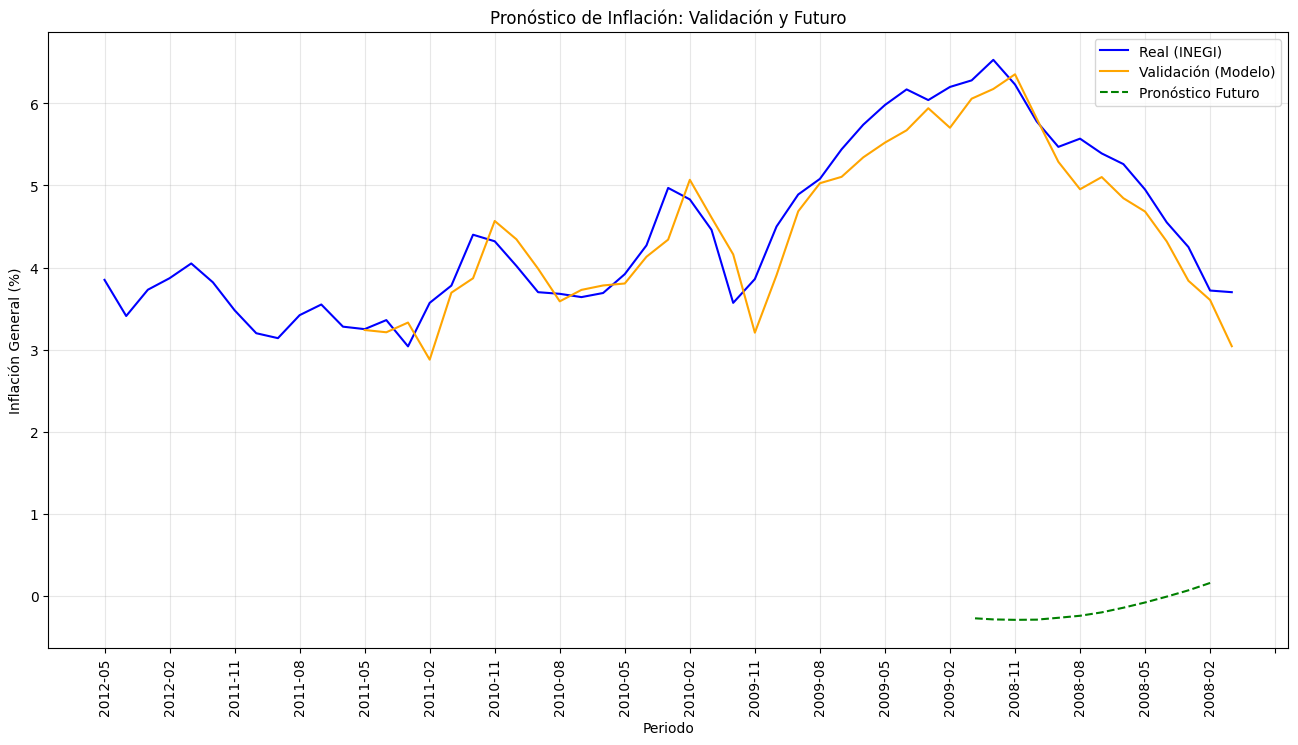

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.title('Pronóstico de Inflación: Validación y Futuro')
plt.xlabel('Periodo')
plt.ylabel('Inflación General (%)')

# 1. Graficar los datos de validación (Lo que ya pasó vs lo que el modelo pensó)
# Usamos 'General' que es tu dato real
plt.plot(dates_valid, valid['General'], label='Real (INEGI)', color='blue')
plt.plot(dates_valid, valid['Predictions'], label='Validación (Modelo)', color='orange')

# 2. Graficar el futuro
# Si las fechas y predicciones tienen el mismo tamaño, se grafican directo.
plt.plot(future_dates, future_predictions, label='Pronóstico Futuro', color='green', linestyle='--')

plt.legend(loc='best')

# Ajustar el eje X para que no se amontonen las fechas
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20)) # Muestra solo ~20 etiquetas

plt.grid(True, alpha=0.3)
plt.show()